In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt


In [4]:
train_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train"
valid_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val"

In [5]:
image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 10 classes.


In [8]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 984 images belonging to 10 classes.


In [9]:
import os

In [10]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return
    
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return
    
    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))
    
    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
    
    plt.tight_layout()
    plt.show()

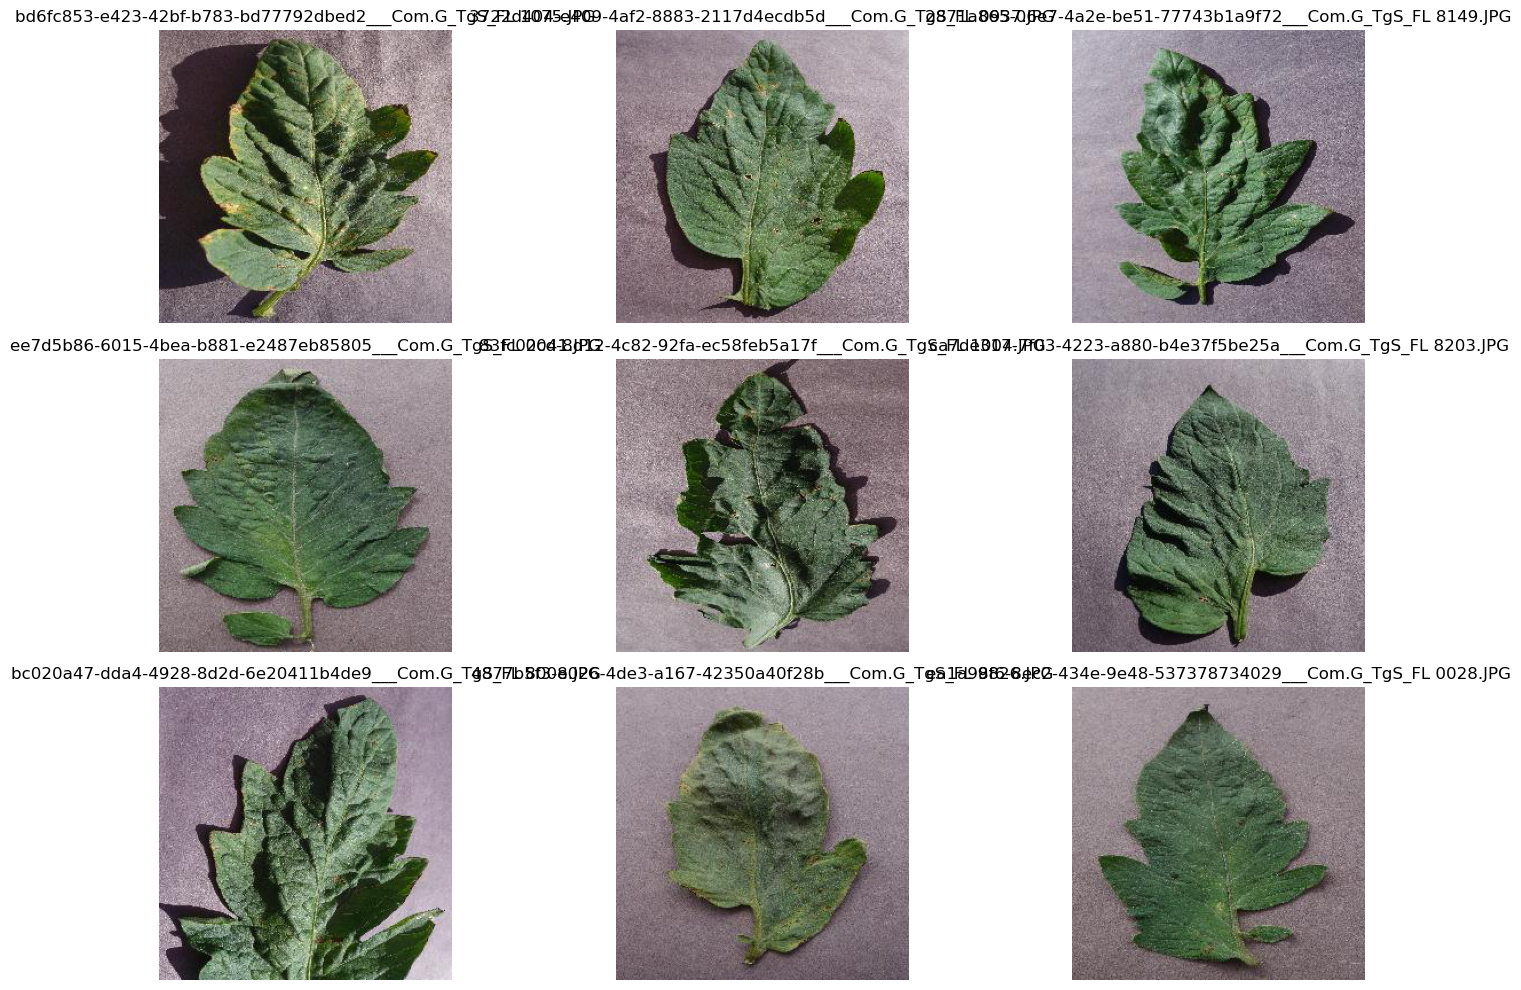

In [12]:
display_random_images(train_path, num_images=9, num_columns=3)

In [13]:
print(train_generator)

In [14]:
train_path

'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16
from glob import glob

In [16]:
vgg16 = VGG16(input_shape= image_size + (3,), weights= "imagenet",include_top= False)

In [17]:
def data_cleaning_and_analysis(directory):
    # Check for missing values
    missing_values = pd.DataFrame(columns=['Subfolder', 'Missing Images'])
    
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    for subfolder in subfolders:
        subfolder_path = os.path.join(directory, subfolder)
        image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        num_missing_images = len(os.listdir(subfolder_path)) - len(image_files)
        missing_values = pd.concat([missing_values, pd.DataFrame({'Subfolder': [subfolder], 'Missing Images': [num_missing_images]})], ignore_index=True)
    
    # Display missing values information
    print("Missing Values Information:")
    print(missing_values)
    
    # Explore class distribution
    class_distribution = pd.DataFrame(columns=['Class', 'Number of Images'])
    for subfolder in subfolders:
        subfolder_path = os.path.join(directory, subfolder)
        num_images = len([filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_distribution = pd.concat([class_distribution, pd.DataFrame({'Class': [subfolder], 'Number of Images':[num_images]})], ignore_index=True)
    
    # Display class distribution information
    print("\nClass Distribution Information:")
    print(class_distribution)

    # Visualize the distribution of images across different classes
    plt.figure(figsize=(12, 6))
    plt.bar(class_distribution['Class'], class_distribution['Number of Images'], color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images Across Classes')
    plt.show()

Missing Values Information:
                                       Subfolder Missing Images
0                        Tomato___Bacterial_spot              0
1                          Tomato___Early_blight              0
2                               Tomato___healthy              0
3                           Tomato___Late_blight              0
4                             Tomato___Leaf_Mold              0
5                    Tomato___Septoria_leaf_spot              0
6  Tomato___Spider_mites Two-spotted_spider_mite              0
7                           Tomato___Target_Spot              0
8                   Tomato___Tomato_mosaic_virus              0
9         Tomato___Tomato_Yellow_Leaf_Curl_Virus              0

Class Distribution Information:
                                           Class Number of Images
0                        Tomato___Bacterial_spot             1000
1                          Tomato___Early_blight             1000
2                               Tomat

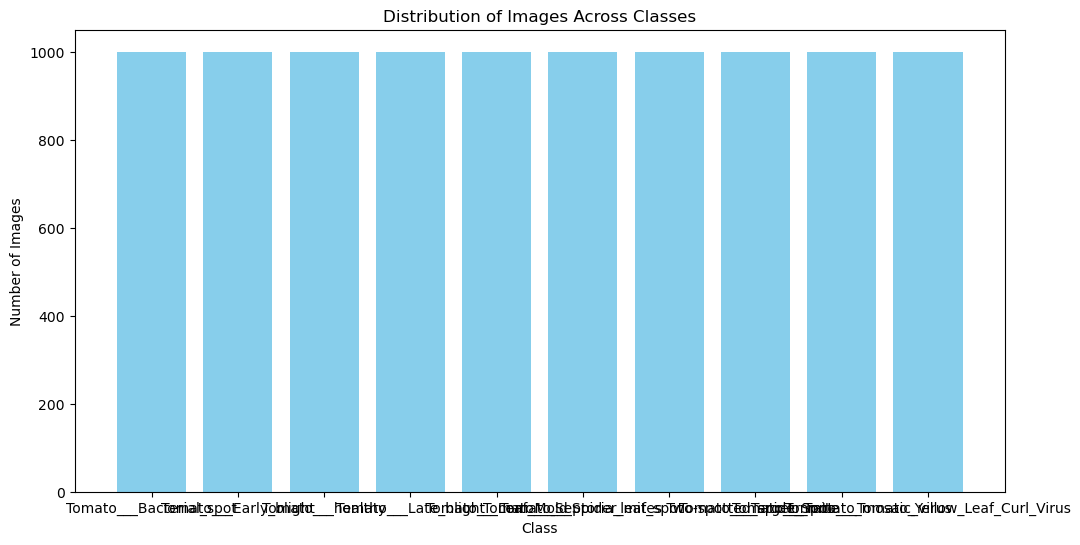

In [18]:
data_cleaning_and_analysis(train_path)

In [19]:
print(vgg16)

In [20]:
for layer in vgg16.layers:
  layer.trainable = False

In [21]:
folders = glob("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\*")
folders

['C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Bacterial_spot',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Early_blight',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___healthy',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Late_blight',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Leaf_Mold',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Target_Spot',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Tomato_mosaic_virus',
 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomat

In [22]:
x = Flatten()(vgg16.output)
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [23]:
prediction = Dense(len(folders),activation = "softmax")(x)

# create a Model Object
model = Model(inputs = vgg16.input,outputs = prediction)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
# Data Preprocessing,
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Preprocess Test size,
test_datagen = ImageDataGenerator(rescale = 1./255)


In [27]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [28]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 984 images belonging to 10 classes.


In [42]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
313/313 [==============================] - 586s 2s/step - loss: 0.2174 - accuracy: 0.9243 - val_loss: 0.7376 - val_accuracy: 0.7988
Epoch 2/20
313/313 [==============================] - 587s 2s/step - loss: 0.2230 - accuracy: 0.9217 - val_loss: 0.6759 - val_accuracy: 0.8272
Epoch 3/20
313/313 [==============================] - 593s 2s/step - loss: 0.2254 - accuracy: 0.9211 - val_loss: 0.5432 - val_accuracy: 0.8476
Epoch 4/20
313/313 [==============================] - 585s 2s/step - loss: 0.2044 - accuracy: 0.9301 - val_loss: 0.5158 - val_accuracy: 0.8537
Epoch 5/20
313/313 [==============================] - 586s 2s/step - loss: 0.1670 - accuracy: 0.9443 - val_loss: 0.6187 - val_accuracy: 0.8354
Epoch 6/20
313/313 [==============================] - 584s 2s/step - loss: 0.1645 - accuracy: 0.9449 - val_loss: 0.6780 - val_accuracy: 0.8222
Epoch 7/20
313/313 [==============================] - 585s 2s/step - loss: 0.1469 - accuracy: 0.9495 - val_loss: 0.7046 - val_accuracy: 0.8272

In [43]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


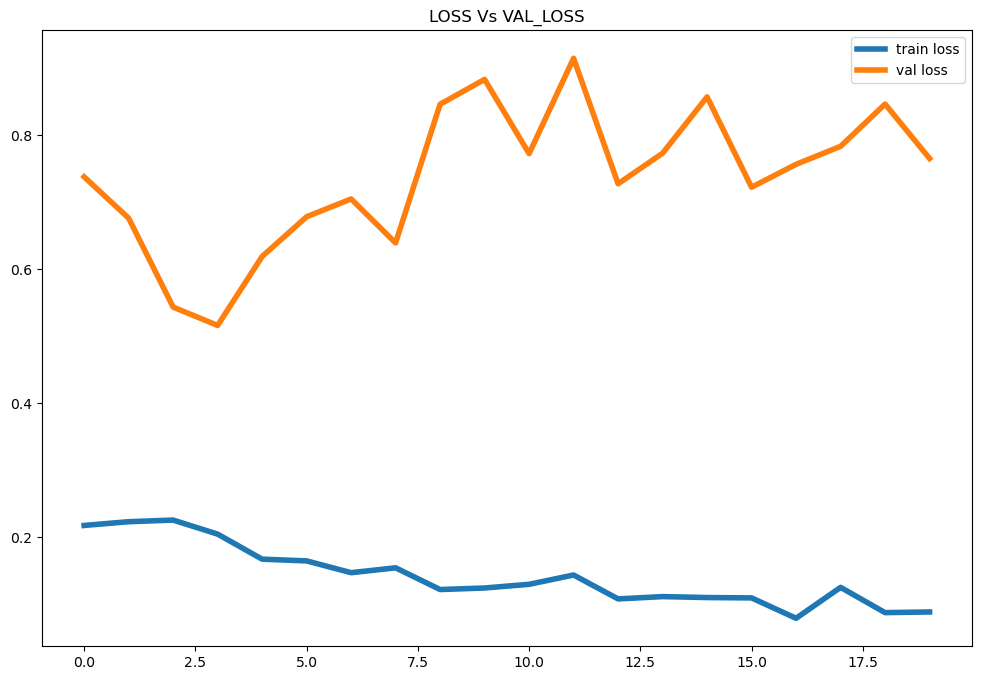

<Figure size 640x480 with 0 Axes>

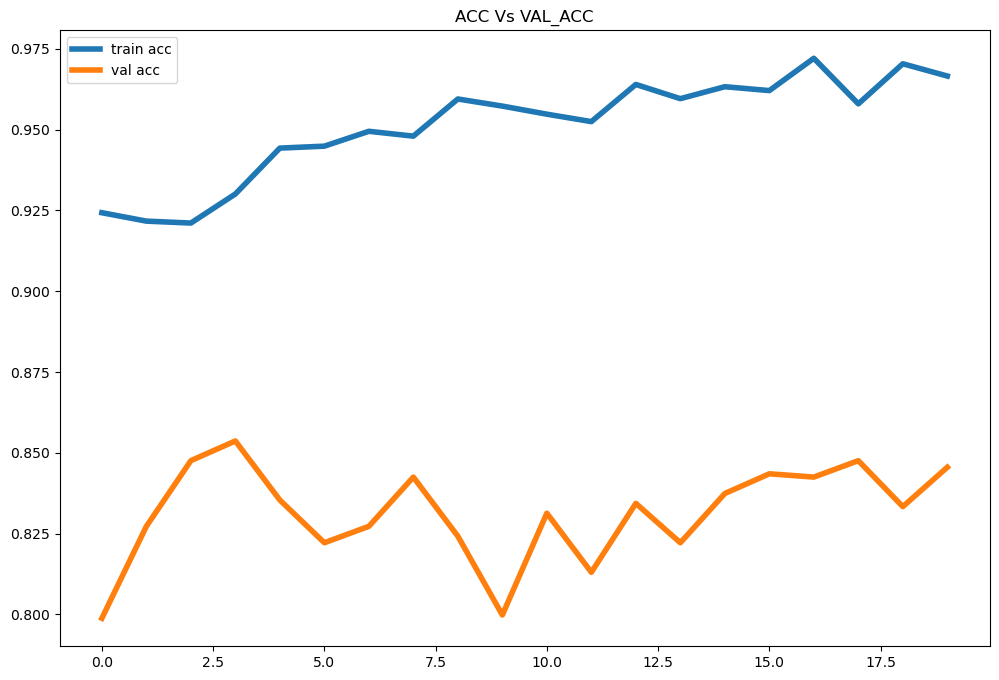

<Figure size 640x480 with 0 Axes>

In [44]:
# plot the loss
plt.figure(figsize = (12,8))
plt.plot(r.history['loss'], label='train loss',linewidth = 4)
plt.plot(r.history['val_loss'], label='val loss',linewidth = 4)
plt.title("LOSS Vs VAL_LOSS")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.figure(figsize = (12,8))
plt.plot(r.history['accuracy'], label='train acc',linewidth = 4)
plt.plot(r.history['val_accuracy'], label='val acc',linewidth = 4)
plt.title("ACC Vs VAL_ACC")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Text(0.5, 1.0, 'Mosaic Virus')

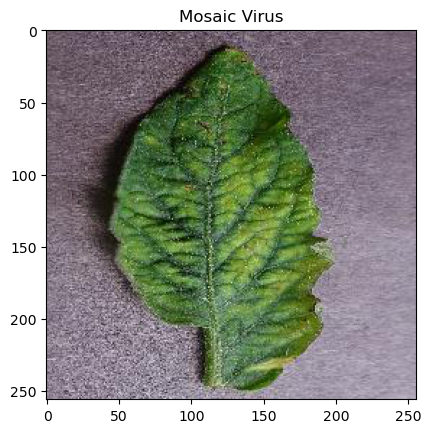

In [45]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train\\Tomato___Tomato_mosaic_virus\\597a2eac-2596-4aed-9b6c-0ec234998ed8___PSU_CG 2210.JPG"))
plt.title("Mosaic Virus")